# Assignment 10

In [120]:
using Random
using StatsBase
using StatsPlots
using GraphRecipes
using LightGraphs
using PlotThemes
using Plots

using Statistics:mean, std

In [305]:
n0, N, m = 2, 10, 1

(2, 10, 1)

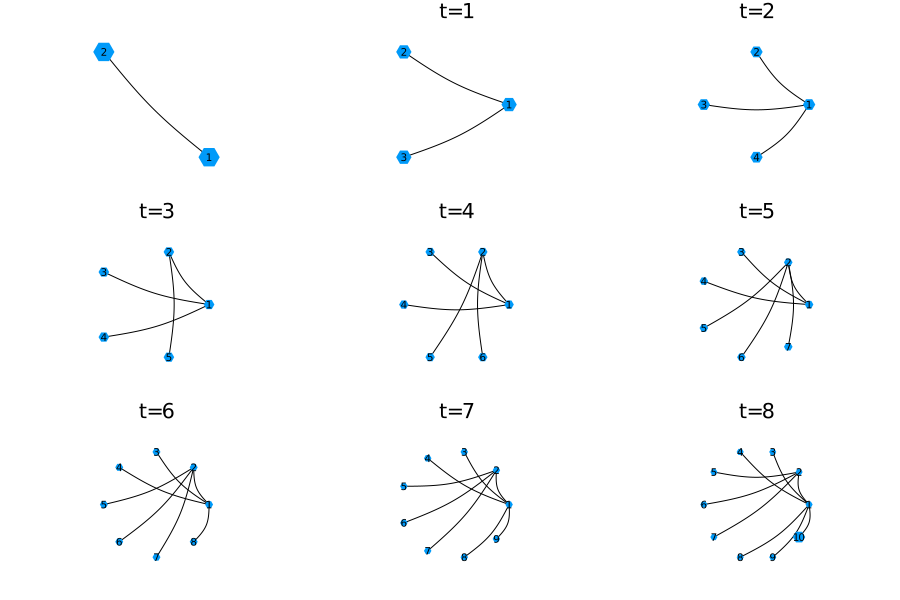

In [306]:
G = SimpleGraph(N)
add_edge!(G, 1, 2)

Random.seed!(314)
nodes = 1:N

plots = Any[]
p = graphplot(G, method=:circular, nodestrokealpha=0, names=nodes, markersize=0.2)
push!(plots, p)

for t=1:N-n0
    probs = ProbabilityWeights(degree(G))
    n_new = n0 + t
    for n_connect in sample(nodes, probs, m, replace=false)
        add_edge!(G, n_new, n_connect)
        p = graphplot(G, method=:circular, nodestrokealpha=0, names=nodes, markersize=0.2)
        plot!(title="t=$t")
        push!(plots, p)
    end
end

plot(plots..., size=(900, 600))

In [307]:
function simulate_ab(n0, N, m)
    nodes = collect(1:N)
    G = SimpleGraph(N)
    add_edge!(G, 1, 2)

    for t=1:N-n0
        probs = ProbabilityWeights(degree(G))
        n_new = n0 + t
        for n_connect in sample(nodes, probs, m, replace=false)
            add_edge!(G, n_new, n_connect)
        end
    end
    return G
end

simulate_ab (generic function with 1 method)

In [308]:
nsims = 500_000
S = zeros((nsims, N))
for i=1:nsims
    G = simulate_ab(n0, N, m)
    kn = degree(G)
    S[i, :] = kn
end

In [309]:
dropdims(expected_k, dims=1)

10-element Array{Float64,1}:
 3.339442
 3.340641
 2.223264
 1.780493
 1.524753
 1.357226
 1.233292
 1.138234
 1.062655
 1.0

In [137]:
l(t) = (binomial(n0, 2) + m * t)
1 + 1 / 2l(7)

1.0625

In [216]:
E_vals = Float64[]

E = 1
append!(E_vals, E)

E = E_vals[end] * (1 + 1 / 2l(5))
append!(E_vals, E)

E = E_vals[end] * (1 + 1 / 2l(6))
append!(E_vals, E)

3-element Array{Float64,1}:
 1.0
 1.0833333333333333
 1.1607142857142856

In [205]:
1 + sum(E_vals ./ 2l.(5:7))

1.2332589285714286

In [186]:
1 + 1 / 2l(6) + 1 / 2l(7)

1.1339285714285714

In [189]:
1 + 1 / 2l(6) + (1 + 1 / 2l(6)) / 2l(7)

1.1383928571428572

In [139]:
1 + 1 / 2l(5) + 1 / 2l(6) + 1 / 2l(7)

1.2172619047619047

In [155]:
1 + 1 / 2l(4) + 1 / 2l(5) + 1 / 2l(6) + 1 / 2l(7)

1.3172619047619047

In [167]:
[1 .+ sum(1 ./ 2l.(i:7)) for i=1:7]

7-element Array{Float64,1}:
 1.8589285714285713
 1.6089285714285713
 1.4422619047619047
 1.3172619047619047
 1.2172619047619047
 1.1339285714285714
 1.0625

### Computing the value n=1

In [278]:
function expected_degree(node)
    if node == 10
        return 1.0
    end
    
    node = node == 2 || node == 1 ? 1 : node - 1
    # Initial node-degree
    E_vals = Float64[1]
    for t=node-1:T-2
        E = E_vals[end] * (1 + 1 / 2l(t))
        append!(E_vals, E)
    end
    
    return 1 + sum(E_vals ./ 2l.(node-1:T-1))
end

expected_degree (generic function with 1 method)

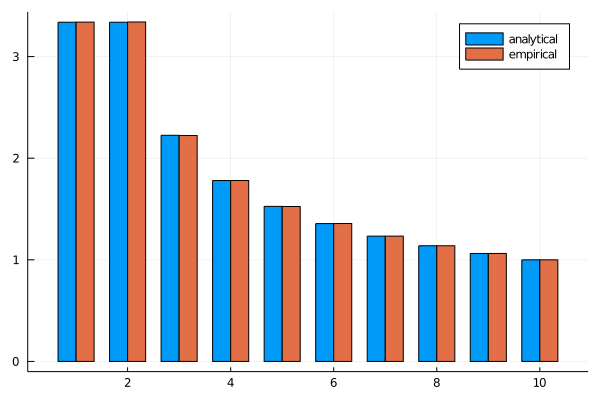

In [304]:
degree_analytical = expected_degree.(1:10)
degree_empirical = dropdims(expected_k, dims=1)

groupedbar([degree_analytical degree_empirical], bar_width=0.7, labels=["analytical" "empirical"])

In [270]:
T = N - n0
nv = 8
E_vals = Float64[]

E = 1
append!(E_vals, E)

for t=(nv - 1):T-2
    E = E_vals[end] * (1 + 1 / 2l(t))
    append!(E_vals, E)
end

1 + sum(E_vals ./ 2l.(nv-1:T-1))

1.0625

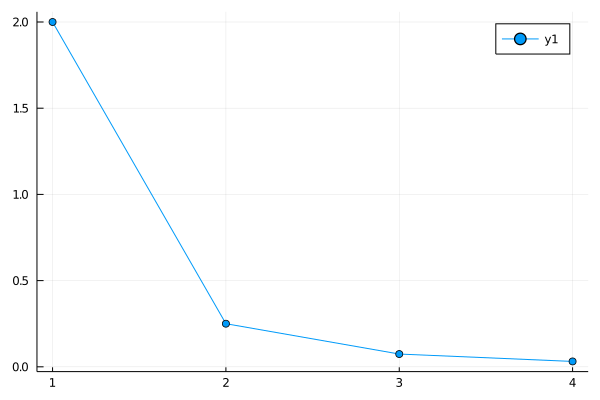

In [118]:
γ = 3.0
plot(1:4, (γ - 1) * (1:4) .^ (-γ), marker=true)

In [107]:
m .* sqrt.(N ./ (1:10))

10-element Array{Float64,1}:
 3.1622776601683795
 2.23606797749979
 1.8257418583505538
 1.5811388300841898
 1.4142135623730951
 1.2909944487358056
 1.1952286093343936
 1.118033988749895
 1.0540925533894598
 1.0

In [100]:
expected_k = mean(S, dims=1)

1×10 Array{Float64,2}:
 3.33944  3.34064  2.22326  1.78049  …  1.23329  1.13823  1.06265  1.0

In [101]:
transpose(expected_k) .+ dropdims(std(S, dims=1), dims=1) .* [-1 1]

10×2 Array{Float64,2}:
 1.46374   5.21515
 1.46642   5.21486
 0.874558  3.57197
 0.756236  2.80475
 0.723123  2.32638
 0.720978  1.99347
 0.737353  1.72923
 0.768351  1.50812
 0.820313  1.305
 1.0       1.0

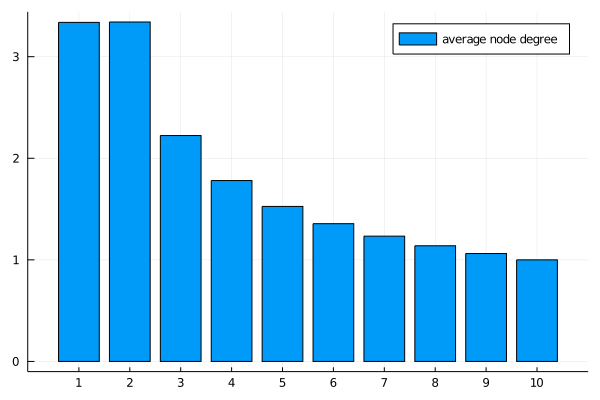

In [70]:
bar(1:N, dropdims(expected_k, dims=1), label="average node degree")
xticks!(1:10)

┌ Info: Saved animation to 
│   fn = /Users/gerardoduran/Documents/repos/QMUL/MTH750P-graphs-and-networks/assignments/anim.gif
└ @ Plots /Users/gerardoduran/.julia/packages/Plots/vsE7b/src/animation.jl:104


Plots.AnimatedGif("/Users/gerardoduran/Documents/repos/QMUL/MTH750P-graphs-and-networks/assignments/anim.gif")
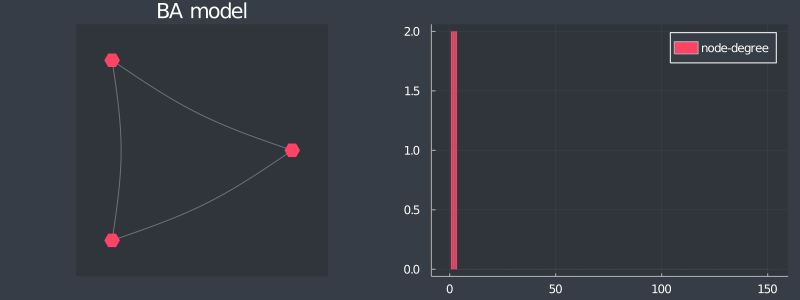

In [33]:
n0, N, m = 2, 150, 2
G = SimpleGraph(N)
add_edge!(G, 1, 2)

nodes = 1:N

anim = @animate for t=1:N-n0
    probs = ProbabilityWeights(degree(G))
    n_new = n0 + t
    for n_connect in sample(nodes, probs, m, replace=false)
        add_edge!(G, n_new, n_connect)
    end
    
    p1 = graphplot(G, method=:circular, nodestrokealpha=0, linealpha=0.3, edgecolor=:white)
    plot!(title="BA model")
    p2 = bar(nodes, degree(G), label="node-degree", linealpha=0.1)

    plot(p1, p2, size=(800, 300))
end

gif(anim, "anim.gif", fps=13)

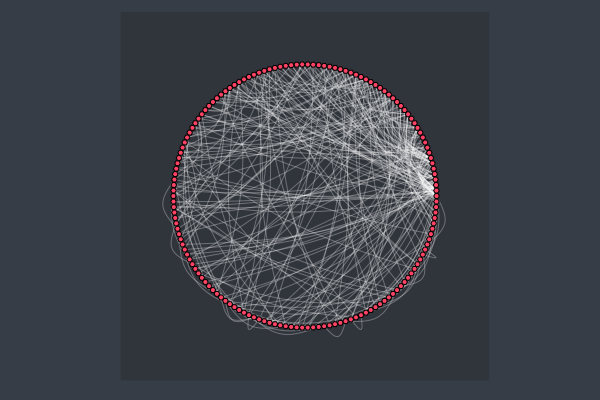

In [38]:
graphplot(G, method=:circular, edgecolor=:white, linealpha=0.3)